In [1]:
import ML_for_WDN
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import wntr
import networkx as nx

# Set working directory
abs_path = '/home/ntm/PhD/ML-for-WDN/notebooks/'
os.chdir(abs_path + '..')


/tmp/ipykernel_184997/1416480772.py:16: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G = wn.get_graph()
/home/ntm/PhD/ML-for-WDN/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/ntm/PhD/ML-for-WDN/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_184997/1416480772.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise i

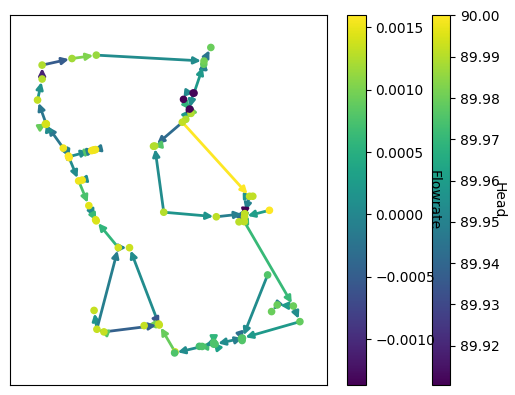

In [14]:
# Getting path for the input file
inputfiles_folder_name = 'epanet_input_files/'
filename = 'IISc_campus.inp'
inp_file = os.path.join(inputfiles_folder_name, filename)

# Reading the input file into EPANET
wn = wntr.network.WaterNetworkModel(inp_file)

sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

head = results.node['head']
flow_rate = results.link['flowrate']
#head = np.asarray(head)

G = wn.get_graph()

vmin = np.min(head).min()
vmax = np.max(head).max()
edge_min = np.min(flow_rate).min()
edge_max = np.max(flow_rate).max()

node_cmap = plt.get_cmap('viridis')
edge_cmap = plt.get_cmap('viridis')

nx.draw_networkx(
    G=G, 
    pos=nx.get_node_attributes(G, 'pos'), 
    with_labels=False,
    node_size=20,
    node_color=results.node['head'].iloc()[0],
    cmap=node_cmap,
    vmin=vmin,
    vmax=vmax,
    edge_color=results.link['flowrate'].iloc()[0],
    edge_cmap=edge_cmap,
    edge_vmin=edge_min,
    edge_vmax=edge_max,
    width=2,
    arrowsize=10,
    )
sm = plt.cm.ScalarMappable(
    cmap=node_cmap,
    norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Head', rotation=270, fontsize=10)

sm = plt.cm.ScalarMappable(
    cmap=edge_cmap,
    norm=plt.Normalize(vmin=edge_min, vmax=edge_max))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Flowrate', rotation=270, fontsize=10)
plt.show()


In [10]:
# Load data
df_with_leak = pd.read_csv(
    'data/raw_data/Leak_Location_1.csv', 
    skiprows=1
)

df_without_leak = pd.read_csv(
    'data/raw_data/No_Leak_Experiment.csv',
    skiprows=1
)

/tmp/ipykernel_184997/1081199950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_leak_FM08['EpochTime'] -= df_with_leak_FM08['EpochTime'].min()
/tmp/ipykernel_184997/1081199950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_leak_FM08['EpochTime'] -= df_without_leak_FM08['EpochTime'].min()


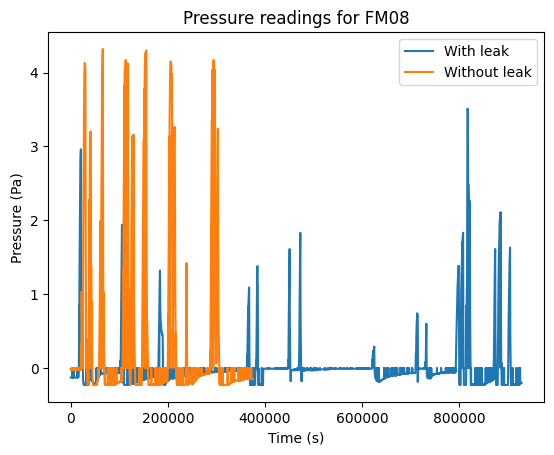

In [11]:
# Get sensor readings for FM08
df_with_leak_FM08 = df_with_leak.loc[df_with_leak['FM.No.'] == 'FM08'] 
df_without_leak_FM08 = df_without_leak.loc[df_without_leak['FM.No.'] == 'FM08']

df_with_leak_FM08['EpochTime'] -= df_with_leak_FM08['EpochTime'].min()
df_without_leak_FM08['EpochTime'] -= df_without_leak_FM08['EpochTime'].min()

# Plot pressure readings for FM08
plt.figure()
plt.plot(
    df_with_leak_FM08['EpochTime'], 
    df_with_leak_FM08['Pressure (bar)'],
    label='With leak'
    )
plt.plot(
    df_without_leak_FM08['EpochTime'], 
    df_without_leak_FM08['Pressure (bar)'],
    label='Without leak'
    )
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure readings for FM08')
plt.show()